In [1]:
import pandas as pd

# Loading the datasets provided
alldata = pd.read_excel('alldata.xlsx')
drdata = pd.read_excel('drdata.xlsx')
drq = pd.read_excel('drq.xlsx')
tv2data = pd.read_excel('tv2data.xlsx')
tv2q = pd.read_excel('tv2q.xlsx')
electeddata = pd.read_excel('electeddata.xlsx')

# Quick overview of the dataset
{
    "alldata": alldata.head(),
    "drdata": drdata.head(),
    "drq": drq.head(),
    "tv2data": tv2data.head(),
    "tv2q": tv2q.head(),
    "electeddata": electeddata.head()
}


{'alldata':    530  531  533  534  535  537  538  540  541  543  ...  9a  9b  10a  10b  \
 0   -1   -2    1   -2    2    1   -2    1    1    2  ...   2   0    1   -2   
 1    2    2   -1   -2   -1   -2    1   -2    2   -2  ...  -2   0   -1    2   
 2    2    1   -2   -2    1   -2    1   -1    1   -1  ...  -1  -2    0    2   
 3    2    1   -2   -1    1    1    1    1    1   -2  ...  -2   2    2    2   
 4    1    1   -2    2   -2    1   -2    1    2   -2  ...  -2   0   -1    0   
 
    11a  11b  12a  12b               storkreds  alder  
 0   -2    1    1    1    Københavns Storkreds     78  
 1    1   -2    0    0          Fyns Storkreds     64  
 2    0   -1    1   -2     Bornholms Storkreds     37  
 3    2   -1    2    0  Nordjyllands Storkreds     28  
 4   -2    0    2   -2    Københavns Storkreds     58  
 
 [5 rows x 53 columns],
 'drdata':    530  531  533  534  535  537  538  540  541  543  ...  552  553  555  556  \
 0   -1   -2    1   -2    2    1   -2    1    1    2  ...   

## Age of the candidates grouped by parties.

In [2]:
# Selecting relevant columns
alldata_filtered = alldata[["parti", "alder"]]

# Removing missing values
alldata_filtered = alldata_filtered.dropna()

# Removing age 0
alldata_filtered = alldata_filtered[alldata_filtered['alder'] > 0]

age_summary_by_party = alldata_filtered.groupby('parti')['alder'].describe()

print(age_summary_by_party)

# Defining age ranges for visualization
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
age_labels = ['18-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85', '85-100']

# Creating a new column to categorize age range
alldata_filtered['age_group'] = pd.cut(alldata_filtered['alder'], bins=age_bins, labels=age_labels, right=False)

# Group by party and age group, and count the number of people in each group
age_grouped_by_party = alldata_filtered.groupby(['parti', 'age_group'], observed=True).size().unstack(fill_value=0)

# Group by party and calculate summary statistics for the 'alder' (age) column
age_summary_by_party = alldata_filtered.groupby('parti')['alder'].describe()


                                             count       mean        std  \
parti                                                                      
Alternativet                                  65.0  47.415385  13.620862   
Danmarksdemokraterne                          37.0  51.216216  10.252737   
Dansk Folkeparti                              49.0  45.530612  12.191360   
Det Konservative Folkeparti                   94.0  44.723404  11.904101   
Enhedslisten                                  71.0  42.225352  15.193229   
Frie Grønne, Danmarks Nye Venstrefløjsparti   26.0  34.807692  10.777826   
Kristendemokraterne                           41.0  50.219512  13.441563   
Liberal Alliance                              68.0  37.970588  13.736291   
Løsgænger                                      3.0  48.000000   9.165151   
Moderaterne                                   42.0  44.261905  13.778845   
Nye Borgerlige                                50.0  48.520000  12.241182   
Radikale Ven

### Better visualization of age of the candidates grouped by parties

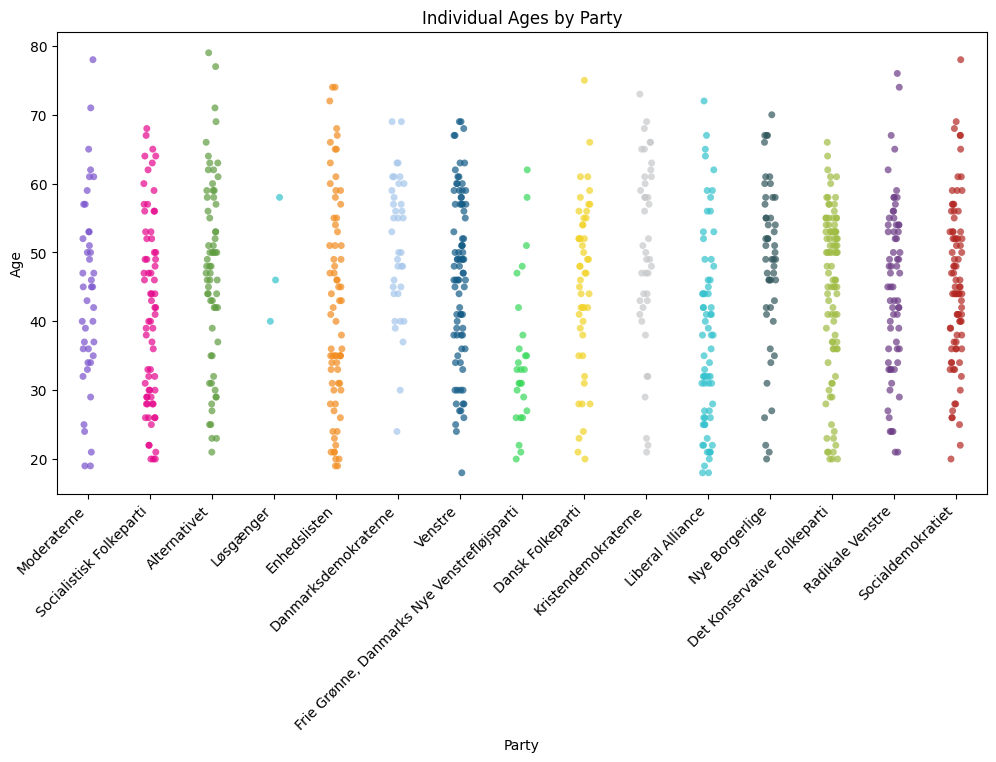

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

color_palette = [
    "#7852CC",  # Moderaterne (M)
    "#E5058A",  # Socialistisk Folkeparti (F)
    "#5E9C3F",  # Alternativet (Å)
    "#34C2CD",  # Løsgænger (Lib. Al. I)
    "#F28C1E",  # Enhedslisten (Ø)
    "#A6C6EC",  # Danmarkdemokraterne (Æ)
    "#125B86",  # Venstre (V)
    "#36D859",  # Frie Grønne (Q)
    "#F2D327",  # Dansk Folkeparti (O)
    "#C7C8CA",  # Kristendemokraterne (K)
    "#34C2CD",  # Liberal Alliance (I)
    "#30565B",  # Nye Borgerlige (D)
    "#A0BC44",  # Det Konservative Folkeparti (C)
    "#6B3B85",  # Radikale Venstre (B)
    "#B32722"   # Socialdemokratiet (A)
]

custom_palette = sns.color_palette(color_palette)

# Plot 1: Strip Plot (Scatter) to visualize individual ages by party with custom colors
plt.figure(figsize=(12, 6))
sns.stripplot(x='parti', y='alder',hue='parti', data=alldata_filtered, jitter=True, size=5, alpha=0.7, palette=custom_palette)

# Customize the plot
plt.title('Individual Ages by Party')
plt.ylabel('Age')
plt.xlabel('Party')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.show()

## An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.

In [4]:
# +2 and -2 responses
strong_responses = alldata.iloc[:, :-2]  # Removed storkreds and age columns

# Count of responses per cand
confident_responses = ((strong_responses == 2) | (strong_responses == -2)).sum(axis=1)

# the prop of confident resp
total_responses = strong_responses.shape[1]  # Total number of responses for cand
confidence_ratio = confident_responses / total_responses

# Adding ratio to original elected data
alldata['confidence_ratio'] = confidence_ratio

# Sorting cand by confidence 
most_confident_candidates = alldata[['storkreds', 'alder', 'confidence_ratio']].sort_values(by='confidence_ratio', ascending=False).head(10)

print("Most Confident Candidates:")
print(most_confident_candidates)

Most Confident Candidates:
                  storkreds  alder  confidence_ratio
505   Sydjyllands Storkreds     43          0.960784
88    Østjyllands Storkreds     50          0.960784
559   Sydjyllands Storkreds     43          0.862745
44    Østjyllands Storkreds     33          0.843137
152    Københavns Storkreds     38          0.843137
503   Sydjyllands Storkreds     57          0.823529
437  Vestjyllands Storkreds     52          0.823529
284  Nordjyllands Storkreds     58          0.823529
359          Fyns Storkreds     58          0.823529
151    Københavns Storkreds     48          0.823529


### Plotting the data on a diagram for better readability

C:\Users\popca\AppData\Local\Temp\ipykernel_23008\3425293785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='confidence_ratio', y='storkreds', data=most_confident_candidates, palette=custom_palette)


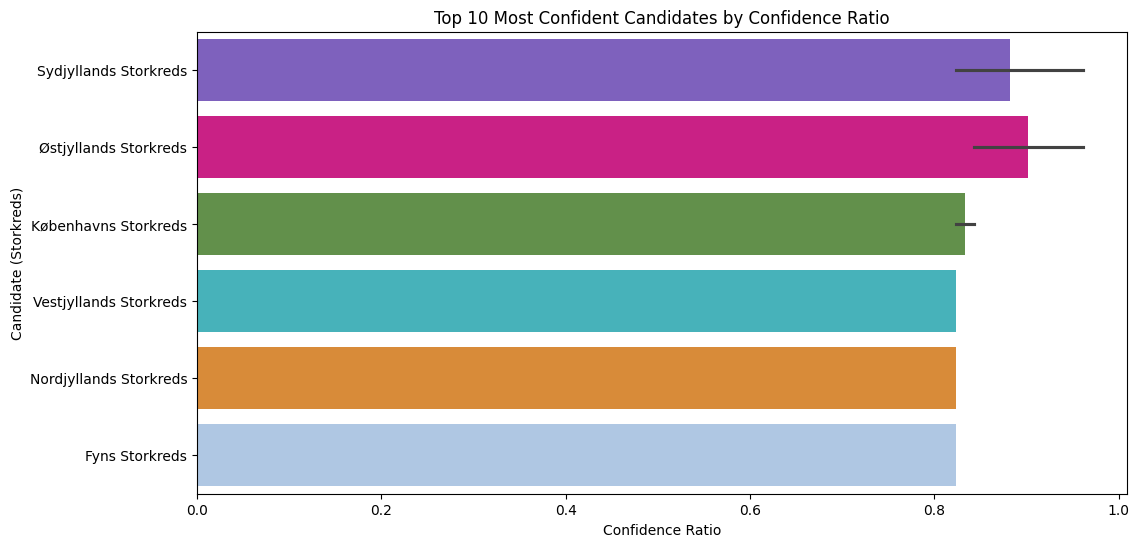

In [5]:

custom_palette = custom_palette[:len(most_confident_candidates['storkreds'].unique())]
plt.figure(figsize=(12, 6))
sns.barplot(x='confidence_ratio', y='storkreds', data=most_confident_candidates, palette=custom_palette)

plt.title('Top 10 Most Confident Candidates by Confidence Ratio')
plt.xlabel('Confidence Ratio')
plt.ylabel('Candidate (Storkreds)')

plt.show()

## Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.

In [6]:
### Differences in responses between candidates, both inter-party and intra-party

numeric_columns = electeddata.select_dtypes(include=['number']).columns # Selection only numeric columns
numeric_responses = electeddata[numeric_columns]    # Storing only numeric data

# Intra-party numeric vals 
party_disagreement = numeric_responses.groupby(electeddata['storkreds']).std().mean(axis=1).sort_values(ascending=False)    
# groupby(electeddata['storkreds']): Groups the data by the 'storkreds' column, which might represent electoral constituencies or parties.
# .std(): Calculates the standard deviation of the responses for each group (in this case, within each party/constituency).
#          A higher standard deviation indicates more disagreement or variation in responses within the party.
# .mean(axis=1): Averages the standard deviation across all response columns for each party.
# .sort_values(ascending=False): Sorts the parties from most disagreement to least.

# Inter-party 
party_mean = numeric_responses.groupby(electeddata['storkreds']).mean().mean(axis=1)
# groupby(electeddata['storkreds']): Groups the data by the 'storkreds' column, which might represent electoral constituencies or parties.
# .mean(): Calculates the average response for each group (in this case, within each party/constituency).
# .mean(axis=1): Averages the average response across all response columns for each party.

# Merging intra- and inter-party 

print("Intra- and Inter-party Analysis:")
print("Intra-party disagreement (std = The standard deviation of responses within each party.): ")
print(party_disagreement)
print("Inter-party position (mean = The average response across all parties.): ")
print(party_mean)


Intra- and Inter-party Analysis:
Intra-party disagreement (std = The standard deviation of responses within each party.): 
storkreds
Fyns Storkreds                 1.610479
Sjællands Storkreds            1.564757
Københavns Storkreds           1.529650
Østjyllands Storkreds          1.508529
Nordjyllands Storkreds         1.487729
Sydjyllands Storkreds          1.475077
Københavns Omegns Storkreds    1.428152
Nordsjællands Storkreds        1.398501
Vestjyllands Storkreds         1.248988
Bornholms Storkreds            1.088944
dtype: float64
Inter-party position (mean = The average response across all parties.): 
storkreds
Bornholms Storkreds            1.150000
Fyns Storkreds                 0.981250
Københavns Omegns Storkreds    0.988000
Københavns Storkreds           0.997000
Nordjyllands Storkreds         1.075789
Nordsjællands Storkreds        0.937143
Sjællands Storkreds            0.935652
Sydjyllands Storkreds          1.024545
Vestjyllands Storkreds         1.017143
Østjyllan

### Plotting the data on a bar chart

C:\Users\popca\AppData\Local\Temp\ipykernel_23008\1752683026.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_disagreement.index, y=party_disagreement, palette=custom_palette)
C:\Users\popca\AppData\Local\Temp\ipykernel_23008\1752683026.py:4: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=party_disagreement.index, y=party_disagreement, palette=custom_palette)


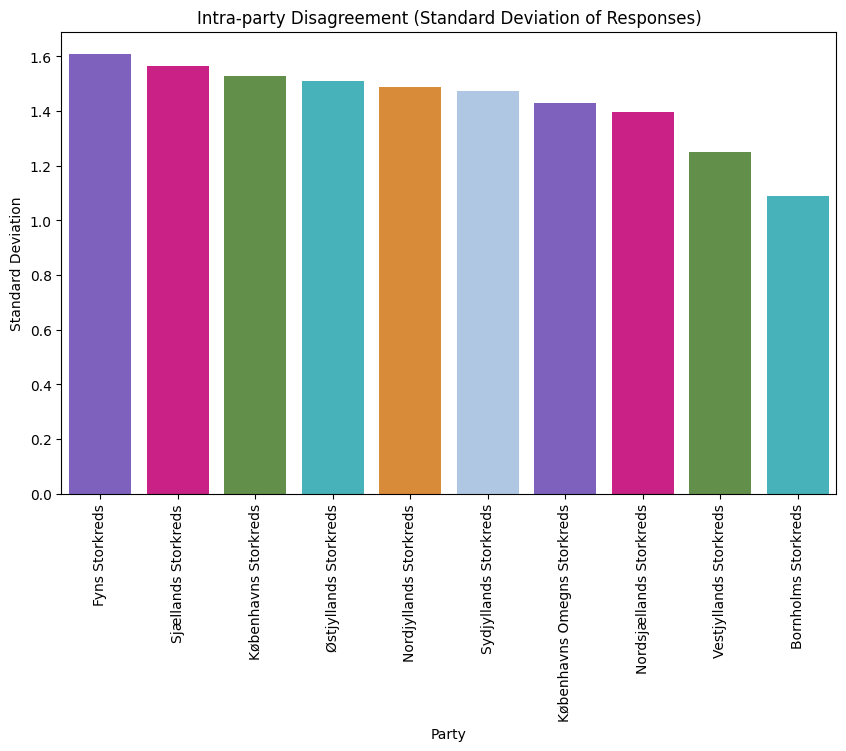

C:\Users\popca\AppData\Local\Temp\ipykernel_23008\1752683026.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_mean.index, y=party_mean, palette=custom_palette)
C:\Users\popca\AppData\Local\Temp\ipykernel_23008\1752683026.py:13: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=party_mean.index, y=party_mean, palette=custom_palette)


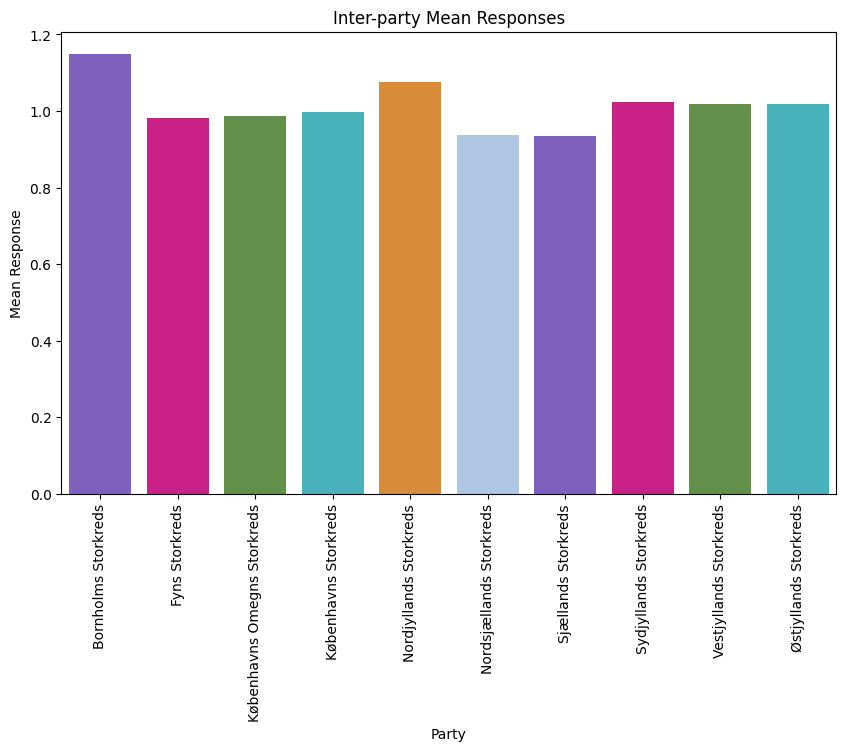

In [7]:
# bar chart for intra-party disagreement
custom_palette = custom_palette[:len(party_disagreement)]
plt.figure(figsize=(10, 6))
sns.barplot(x=party_disagreement.index, y=party_disagreement, palette=custom_palette)
plt.title('Intra-party Disagreement (Standard Deviation of Responses)')
plt.ylabel('Standard Deviation')
plt.xlabel('Party')
plt.xticks(rotation=90)
plt.show()

# bar chart for inter-party mean responses
plt.figure(figsize=(10, 6))
sns.barplot(x=party_mean.index, y=party_mean, palette=custom_palette)
plt.title('Inter-party Mean Responses')
plt.ylabel('Mean Response')
plt.xlabel('Party')
plt.xticks(rotation=90)
plt.show()

## Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice, i.e. a total of 5 models are to be trained.


## Data preparation

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

alldata = pd.read_excel('alldata.xlsx')

X = alldata.select_dtypes(include=['number'])  # The numeric columns (candidate responses)
y = alldata['parti']  # The party column

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Reusable evaluation function

In [9]:
# define reusable evaluation function
def fit_eval(model, X_train, y_train, X_test, y_test):

    # fit the model first
    model.fit(X_train, y_train)

    # predict on both train and test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # calculate train and test accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    return model, train_acc, test_acc

## Decision Tree

In [10]:

# Decision Tree Classifier, parameter grid 
param_grid_dt = {
       'max_depth': [3, 5, 7],
       'min_samples_split': [2, 4, 6]
}

dt_model = DecisionTreeClassifier(random_state=7)
dt_model = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# evaluate performance
dt_model, dt_train_acc, dt_test_acc = fit_eval(dt_model, X_train, y_train, X_test, y_test)

# output
print('Best parameters:', dt_model.best_params_)
print('Decision Tree Accuracy (train / test):', dt_train_acc, '/', dt_test_acc)


C:\Users\popca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': 7, 'min_samples_split': 4}
Decision Tree Accuracy (train / test): 0.886002886002886 / 0.764367816091954


## Random Forest

In [11]:
# Random Forest Classifier, parameter grid 
param_grid_rf = {
    'n_estimators': [150, 250, 350],
       'max_depth': [3, 5, 7],
       'min_samples_split': [2, 4, 6]
}
rf_model = RandomForestClassifier(n_estimators=100, random_state=7)
rf_model = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# evaluate performance
rf, rf_train_acc, rf_test_acc = fit_eval(rf_model, X_train, y_train, X_test, y_test)

# output
print('Best parameters:', rf.best_params_)
print('Random Forest Accuracy (train / test):', rf_train_acc, '/', rf_test_acc)

C:\Users\popca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 350}
Random Forest Accuracy (train / test): 0.9841269841269841 / 0.9367816091954023


## Gradient Boosting Classifier

In [12]:

# Gradient Boosting Classifier, parameter grid 
from sklearn.model_selection import StratifiedKFold

param_grid_gb = {
    'learning_rate': [0.075],  # Try fewer options
    'n_estimators': [250],     # Reduce this if needed
    'max_depth': [3, 5],
    'min_samples_split': [4]   # Use a single value to reduce combinations
}

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=7)
# Use StratifiedKFold in GridSearchCV
gb_model = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# evaluate performance
gb_model, gb_train_acc, gb_test_acc = fit_eval(gb_model, X_train, y_train, X_test, y_test)

# output
print('Best parameters:', gb_model.best_params_)
print('Gradient Boosted Accuracy (train / test):', gb_train_acc, '/', gb_test_acc)


C:\Users\popca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'learning_rate': 0.075, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 250}
Gradient Boosted Accuracy (train / test): 1.0 / 0.8735632183908046


## Logistic Regression

In [13]:

# Logistic Regression, parameter grid
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}
lr_model = LogisticRegression(random_state=42, max_iter=2000)
lr_model = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Support Vector Machine Classifier, parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
lr_model, lr_train_acc, lr_test_acc = fit_eval(lr_model, X_train, y_train, X_test, y_test)

# output
print('Best parameters:', lr_model.best_params_)
print('Logistic regression (train / test):', lr_test_acc, '/', lr_test_acc)

C:\Users\popca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'C': 0.1, 'solver': 'lbfgs'}
Logistic regression (train / test): 0.9195402298850575 / 0.9195402298850575


In [14]:
# Support Vector Machine Classifier, parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_model= SVC(random_state=42, max_iter=1000)
svm_model= GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# evaluate performance
svm_model, svm_train_acc, svm_test_acc = fit_eval(svm_model, X_train, y_train, X_test, y_test)

# output
print('Best parameters:', svm_model.best_params_)
print('Random Forest Accuracy (train / test):', svm_train_acc, '/', svm_test_acc)


C:\Users\popca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'C': 10, 'kernel': 'rbf'}
Random Forest Accuracy (train / test): 0.9523809523809523 / 0.9425287356321839


## Find misclassified candidates

In [15]:
# Fit the Random Forest model
rf_model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_r_test = rf_model.predict(X_test)

# Find the misclassified indices
misclassified_indices = (y_test != y_pred_r_test)  

# Extract the misclassified 'navn' from the original dataset using the test indices
misclassified_names = alldata.loc[X_test.index[misclassified_indices], 'navn']

print("Misclassified candidates (Example using Random Forest model):\n", misclassified_names)

C:\Users\popca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Misclassified candidates (Example using Random Forest model):
 525           Marianne Karlberg
433          Rishi Balachandran
275            Dorte M. Nielsen
139        Linea Søgaard-Lidell
473                    Ole Gade
63       Kurt Vind Christiansen
500        Johanna-Maria Precht
260         Christian Langballe
829                  Peter Loft
512              Søren Espersen
630    Marcus Techow Danielsson
Name: navn, dtype: object
